# Import Relevant libraries

In [23]:
# dataset
import numpy as np
import tensorflow as tf
from numpy import genfromtxt
import matplotlib.pyplot as plt
print(tf.__version__)

np.random.seed(0) # please do not remove this line
tf.random.set_seed(0)

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# shuffle
idx = np.arange(data.shape[0])
np.random.shuffle(idx)
data = data[idx]

N = data.shape[0]
X = data[:,:-1]
y = data[:,-1:]

# normalize data
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

X_b = np.c_[np.ones((N, 1)), X] # add one to the begining

2.9.1


In [24]:
TRAIN_SIZE = 0.8
VAL_SIZE = 0.0
#TEST_SIZE = 0.2
TRAIN_SAMPLES = int(TRAIN_SIZE * data.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * data.shape[0])

X_train, y_train = X_b[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X_b[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X_b[VAL_SAMPLES:], y[VAL_SAMPLES:]

print(X_train.shape, X_test.shape)

(160, 4) (40, 4)


# Train

Epoch: 10, Training log loss: 1.184
Epoch: 20, Training log loss: 0.759
Epoch: 30, Training log loss: 0.650
Epoch: 40, Training log loss: 0.575
Epoch: 50, Training log loss: 0.519
Epoch: 60, Training log loss: 0.476
Epoch: 70, Training log loss: 0.443
Epoch: 80, Training log loss: 0.418
Epoch: 90, Training log loss: 0.399


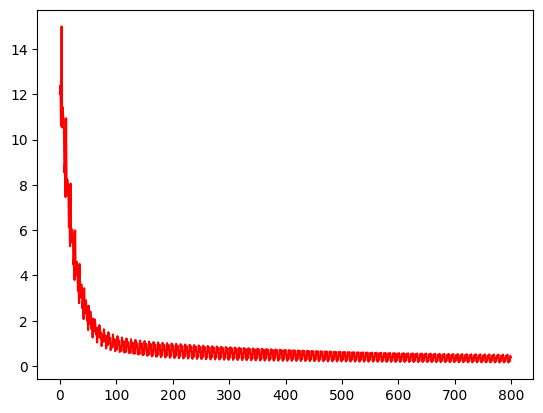

In [25]:
def compute_output(theta, X):
    return tf.matmul(X, theta)

def mini_batch_gradient_descent():
    # some params
    learning_rate = 0.01
    n_epochs = 100
    minibatch_size = 20
    losses = []
        
    # khởi tạo giá trị tham số    
    # theta [b, W]
    theta = tf.Variable(np.random.randn(4, 1), 
                        dtype=tf.float64)
    
    thetas_path = []

    for epoch in range(n_epochs):
                        
        for i in range(0, X_train.shape[0], minibatch_size):
            xi = X_train[i:i+minibatch_size]
            yi = y_train[i:i+minibatch_size]            
            
            with tf.GradientTape() as t:
                # feed forward
                y_hat = compute_output(theta, xi)                

                # MSE loss       
                loss = tf.reduce_mean(tf.square(y_hat - yi))
                                
            loss_mean = np.sum(loss)/minibatch_size
            
            # debug
            losses.append(loss_mean)           
           
            # gradient        
            dtheta = t.gradient(loss, theta)

            # update
            theta.assign_sub(learning_rate*dtheta)

            thetas_path.append(theta)              
        if epoch % 10 == 0 and epoch != 0:
            print(f"Epoch: {epoch}, Training log loss: {loss_mean:.3f}")
    return thetas_path, losses

thetas_path, losses = mini_batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(len(losses)))
plt.plot(x_axis,losses, color="r")
plt.show()

In [26]:
# Best loss after 1 epoch with minibatch_size = 20: 10.537045063996183
print(np.min(losses))

0.15932534741839977


In [27]:
# Best loss after 100 epoch with minibatch_size = 20: 0.15932534741839977
print(np.min(losses))

0.15932534741839977


In [28]:
# Predict with test
theta = thetas_path[-1]
preds = compute_output(theta, X_test)
temp = np.concatenate([preds.numpy(), y_test], axis=1)


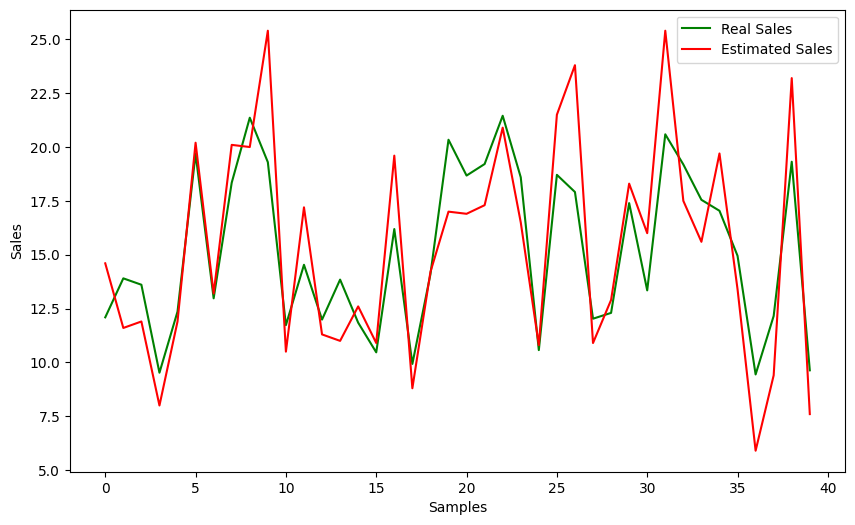

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')    
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.plot(preds, c='green', label='Real Sales')
plt.plot(y_test, c='red', label='Estimated Sales')
plt.legend()
plt.show()